# CREDIT CARD SPEND PREDICTION & IDENTIFY DRIVERS FOR SPEND

## </red> Business Problem:  
One of the global banks would like to understand what factors driving credit card spend are. The bank want use these insights to calculate credit limit. In order to solve the problem, the bank conducted survey of 5000 customers and collected data.  
The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card). Given the factors, predict credit limit for the new applicants.

### </red> Data Availability:  


 * Data for the case are available in xlsx format.  
 * The data have been provided for 5000 customers.   
 * Detailed data dictionary has been provided for understanding the data in the data.  
 *  Data is encoded in the numerical format to reduce the size of the data however some of the variables are categorical. 
 * You can find the details in the data dictionary. 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas_profiling
import statsmodels.api as sm

import itertools

%matplotlib inline
plt.rcParams['figure.figsize']= 10, 7.5
plt.rcParams['axes.grid']= True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from time import strptime

<Figure size 720x540 with 0 Axes>

In [2]:
 %cd D:\ANALYTIXLAB\PYTHON\PROJECTS\1. Predicting Credit Card Spend & Identifying Key Drivers\Resubmission

D:\ANALYTIXLAB\PYTHON\PROJECTS\1. Predicting Credit Card Spend & Identifying Key Drivers\Resubmission


In [3]:
creditcard=pd.read_excel('CCData.xlsx')

In [4]:
creditcard.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 130 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   custid             5000 non-null   object 
 1   region             5000 non-null   int64  
 2   townsize           5000 non-null   int64  
 3   gender             5000 non-null   int64  
 4   age                5000 non-null   int64  
 5   agecat             5000 non-null   int64  
 6   birthmonth         5000 non-null   object 
 7   ed                 5000 non-null   int64  
 8   edcat              5000 non-null   int64  
 9   jobcat             5000 non-null   int64  
 10  union              5000 non-null   int64  
 11  employ             5000 non-null   int64  
 12  empcat             5000 non-null   int64  
 13  retire             5000 non-null   int64  
 14  income             5000 non-null   int64  
 15  lninc              5000 non-null   float64
 16  inccat             5000

In [5]:
creditcard.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [6]:
creditcard['Total_Spend']=creditcard['cardspent']+creditcard['card2spent']

In [7]:
creditcard.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_Spend
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,...,0,0,1,1,0,0,0,1,0,149.46
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,...,1,1,1,1,1,1,0,0,0,77.54
2,5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,...,0,0,0,0,0,1,0,0,0,359.97
3,4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,...,0,1,1,1,0,1,1,0,0,359.41
4,8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,...,0,1,0,1,0,0,0,1,0,507.83


In [8]:
creditcard.drop(['cardspent','card2spent','custid'],inplace=True,axis=1)

In [9]:
def tomonth(x):
    month_name= x
    month_number=strptime(month_name, '%B').tm_mon
    return month_number

creditcard['birthmonth']=creditcard['birthmonth'].map(lambda x: tomonth(x))

In [10]:
creditcard.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_Spend
0,1,2,1,20,2,9,15,3,1,1,...,0,0,1,1,0,0,0,1,0,149.46
1,5,5,0,22,2,5,17,4,2,0,...,1,1,1,1,1,1,0,0,0,77.54
2,3,4,1,67,6,6,14,2,2,0,...,0,0,0,0,0,1,0,0,0,359.97
3,4,3,0,23,2,5,16,3,2,0,...,0,1,1,1,0,1,1,0,0,359.41
4,2,2,0,26,3,7,16,3,2,0,...,0,1,0,1,0,0,0,1,0,507.83


In [11]:
creditcard.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 128 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             5000 non-null   int64  
 1   townsize           5000 non-null   int64  
 2   gender             5000 non-null   int64  
 3   age                5000 non-null   int64  
 4   agecat             5000 non-null   int64  
 5   birthmonth         5000 non-null   int64  
 6   ed                 5000 non-null   int64  
 7   edcat              5000 non-null   int64  
 8   jobcat             5000 non-null   int64  
 9   union              5000 non-null   int64  
 10  employ             5000 non-null   int64  
 11  empcat             5000 non-null   int64  
 12  retire             5000 non-null   int64  
 13  income             5000 non-null   int64  
 14  lninc              5000 non-null   float64
 15  inccat             5000 non-null   int64  
 16  debtinc            5000

In [12]:
#Creating categorical variables
for i in ['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union','employ','empcat','retire','inccat','default',
          'jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown','cartype','carcatvalue',
          'carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle','commutecarpool','commutebus',
          'commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason','polview',
          'polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat','card2',
          'card2type','card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast','churn','tollfree','equip',
          'callcard','wireless','multline','voice','pager','internet','callid','callwait','forward','confer','ebill','owntv',
          'ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02',
          'response_03']:
    
    creditcard[i]=creditcard[i].apply(str)

In [13]:
creditcard.info(verbose=True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 128 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             5000 non-null   object 
 1   townsize           5000 non-null   object 
 2   gender             5000 non-null   object 
 3   age                5000 non-null   int64  
 4   agecat             5000 non-null   object 
 5   birthmonth         5000 non-null   object 
 6   ed                 5000 non-null   int64  
 7   edcat              5000 non-null   object 
 8   jobcat             5000 non-null   object 
 9   union              5000 non-null   object 
 10  employ             5000 non-null   object 
 11  empcat             5000 non-null   object 
 12  retire             5000 non-null   object 
 13  income             5000 non-null   int64  
 14  lninc              5000 non-null   float64
 15  inccat             5000 non-null   object 
 16  debtinc            5000

### Data Preprocessing:


In [14]:
#Droping these variables because these varibales are highly correlated and log of these varibales are already present in the data.
creditcard.drop(['addresscat','agecat','cardtenure','commutecat','edcat','equipmon',
                 'longten', 'spoused','spousedcat','income','creddebt','othdebt','longmon',
                 'tollmon','tollten','equipten','cardmon','cardten','wiremon','wireten'], axis=1, inplace= True)

In [15]:
numeric_var_names=[key for key in dict(creditcard.dtypes) if dict(creditcard.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(creditcard.dtypes) if dict(creditcard.dtypes)[key] in ['object']]
print (numeric_var_names) 
print (cat_var_names)

['age', 'ed', 'lninc', 'debtinc', 'lncreddebt', 'lnothdebt', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'tenure', 'lnlongmon', 'lnlongten', 'lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon', 'lncardten', 'lnwiremon', 'lnwireten', 'hourstv', 'Total_Spend']
['region', 'townsize', 'gender', 'birthmonth', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'homeown', 'hometype', 'address', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'activ

In [16]:
creditcard_num=creditcard[numeric_var_names]
creditcard_num.head()

,age,ed,lninc,debtinc,lncreddebt,lnothdebt,reside,pets,pets_cats,pets_dogs,...,lntollmon,lntollten,lnequipmon,lnequipten,lncardmon,lncardten,lnwiremon,lnwireten,hourstv,Total_Spend
0,20,15,3.433987,11.1,0.183079,0.806516,3,0,0,0,...,3.367296,5.081715,3.384390,4.837075,2.656757,4.094345,0.000000,0.000000,13,149.46
1,22,17,2.708050,18.6,0.200505,0.449788,2,6,0,0,...,0.000000,0.000000,4.004602,7.588324,2.772589,6.413459,3.821004,7.428660,18,77.54
2,67,14,3.555348,9.9,-0.074056,0.930738,3,3,2,1,...,0.000000,0.000000,0.000000,0.000000,3.135494,7.251345,0.000000,0.000000,21,359.97
3,23,16,2.995732,5.7,-3.780995,0.110826,5,0,0,0,...,0.000000,0.000000,0.000000,0.000000,3.044522,6.529419,0.000000,0.000000,26,359.41
4,26,16,3.135494,1.7,-1.538705,-1.735336,4,0,0,0,...,2.803360,5.960232,0.000000,0.000000,2.847812,5.886104,2.947067,6.018106,27,507.83


In [17]:
#Creating Data Audit Report for Numerical
#Use general function that returns multiple values:
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.dropna().quantile(.01),
                     x.dropna().quantile(.05),x.dropna().quantile(0.10),x.dropna().quantile(.25),x.dropna().quantile(0.50),
                     x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),
                     x.max()], index=['N','NMISS','SUM','MEAN','MEDIAN','STD','VAR','MIN','P1','P5','P10','P25','P50','P75',
                                      'P90','P95','P99','MAX'])
num_summary=creditcard_num.apply(lambda x:var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,315.784902,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,10.765504,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
lninc,5000.0,0.0,1.849955e+04,3.699909,3.637586,0.747072,0.558116,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605839,6.978214
debtinc,5000.0,0.0,4.977080e+04,9.954160,8.800000,6.399783,40.957226,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
lncreddebt,5000.0,0.0,-6.521372e+02,-0.130427,-0.076020,1.272932,1.620357,-6.597334,-3.401644,-2.291595,-1.737699,-0.952498,-0.076020,0.724559,1.458492,1.852071,2.658885,4.692014
lnothdebt,5000.0,0.0,3.483879e+03,0.696776,0.741242,1.128508,1.273531,-4.092107,-2.168235,-1.243358,-0.780244,-0.018535,0.741242,1.462046,2.087167,2.469453,3.180727,4.952011
reside,5000.0,0.0,1.102000e+04,2.204000,2.000000,1.393977,1.943173,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,9.000000
pets,5000.0,0.0,1.533700e+04,3.067400,2.000000,3.414497,11.658789,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,8.000000,10.000000,13.000000,21.000000
pets_cats,5000.0,0.0,2.502000e+03,0.500400,0.000000,0.860783,0.740948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,6.000000
pets_dogs,5000.0,0.0,1.962000e+03,0.392400,0.000000,0.796084,0.633749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,7.000000


#### 1. Outlier Treatment:

In [18]:
#Handling Outliers:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x
creditcard_num=creditcard_num.apply(lambda x:outlier_capping(x))

#### 2. Missing Value treatment

In [19]:
#Handling Missing Value
def Missing_imputation(x):
    x=x.fillna(x.mean())
    return x
creditcard_num=creditcard_num.apply(lambda x:Missing_imputation(x))

In [20]:
num_summary=creditcard_num.apply(lambda x:var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,315.784902,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,7.272100e+04,14.544200,14.000000,3.242553,10.514149,8.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,21.000000
lninc,5000.0,0.0,1.848525e+04,3.697049,3.637586,0.738495,0.545375,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605802,5.605839
debtinc,5000.0,0.0,4.957060e+04,9.914120,8.800000,6.241691,38.958700,0.700000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,29.200000
lncreddebt,5000.0,0.0,-6.387694e+02,-0.127754,-0.076020,1.241273,1.540758,-3.401644,-3.401598,-2.291595,-1.737699,-0.952498,-0.076020,0.724559,1.458492,1.852071,2.658860,2.658885
lnothdebt,5000.0,0.0,3.491229e+03,0.698246,0.741242,1.104462,1.219837,-2.168235,-2.168229,-1.243358,-0.780244,-0.018535,0.741242,1.462046,2.087167,2.469453,3.180653,3.180727
reside,5000.0,0.0,1.097100e+04,2.194200,2.000000,1.361491,1.853657,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000
pets,5000.0,0.0,1.524600e+04,3.049200,2.000000,3.351213,11.230625,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,8.000000,10.000000,13.000000,13.000000
pets_cats,5000.0,0.0,2.452000e+03,0.490400,0.000000,0.822462,0.676443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,3.000000
pets_dogs,5000.0,0.0,1.914000e+03,0.382800,0.000000,0.754969,0.569978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,3.000000


In [21]:
creditcard_num.corr()

,age,ed,lninc,debtinc,lncreddebt,lnothdebt,reside,pets,pets_cats,pets_dogs,...,lntollmon,lntollten,lnequipmon,lnequipten,lncardmon,lncardten,lnwiremon,lnwireten,hourstv,Total_Spend
age,1.000000,-0.093966,0.142984,0.039031,0.108048,0.126986,-0.338338,0.026334,0.015743,0.013091,...,0.034955,0.086301,-0.132051,-0.081547,0.320179,0.411189,-0.064840,-0.027627,-0.027318,0.031680
ed,-0.093966,1.000000,0.206332,0.013871,0.129898,0.154590,0.022048,0.031113,0.008898,0.026018,...,0.026400,0.020551,0.444578,0.434370,-0.049900,-0.061484,0.340456,0.329567,-0.009821,0.100943
lninc,0.142984,0.206332,1.000000,0.013177,0.583844,0.665810,-0.057788,0.005846,0.002866,0.014187,...,0.191792,0.210457,0.096284,0.111044,0.149814,0.173846,0.190829,0.205523,0.108643,0.396852
debtinc,0.039031,0.013871,0.013177,1.000000,0.552910,0.628168,-0.026233,-0.002531,0.001028,-0.003278,...,-0.018041,-0.014213,-0.004764,-0.001577,0.013214,0.018317,-0.001034,0.002502,-0.011577,0.015066
lncreddebt,0.108048,0.129898,0.583844,0.552910,1.000000,0.675448,-0.048186,-0.009845,-0.002685,0.002009,...,0.081385,0.093624,0.055743,0.065307,0.088721,0.107814,0.097915,0.107431,0.040358,0.247835
lnothdebt,0.126986,0.154590,0.665810,0.628168,0.675448,1.000000,-0.070173,0.008033,0.015830,0.004048,...,0.112052,0.127441,0.059696,0.071215,0.104110,0.124576,0.125449,0.137363,0.062290,0.266357
reside,-0.338338,0.022048,-0.057788,-0.026233,-0.048186,-0.070173,1.000000,-0.016431,-0.018253,-0.018430,...,0.030228,0.020477,0.025131,0.022231,-0.036303,-0.050601,0.021880,0.017881,0.027196,-0.005729
pets,0.026334,0.031113,0.005846,-0.002531,-0.009845,0.008033,-0.016431,1.000000,0.249982,0.216388,...,-0.008517,-0.003923,0.026683,0.026746,0.014865,0.023630,0.009897,0.009630,0.019436,0.001849
pets_cats,0.015743,0.008898,0.002866,0.001028,-0.002685,0.015830,-0.018253,0.249982,1.000000,-0.000846,...,-0.028679,-0.026510,0.008935,0.010136,-0.016065,-0.015505,0.003737,0.002728,0.001690,0.009498
pets_dogs,0.013091,0.026018,0.014187,-0.003278,0.002009,0.004048,-0.018430,0.216388,-0.000846,1.000000,...,0.009071,0.013776,0.001231,0.003515,0.011132,0.017098,0.011317,0.014090,0.004590,0.024718


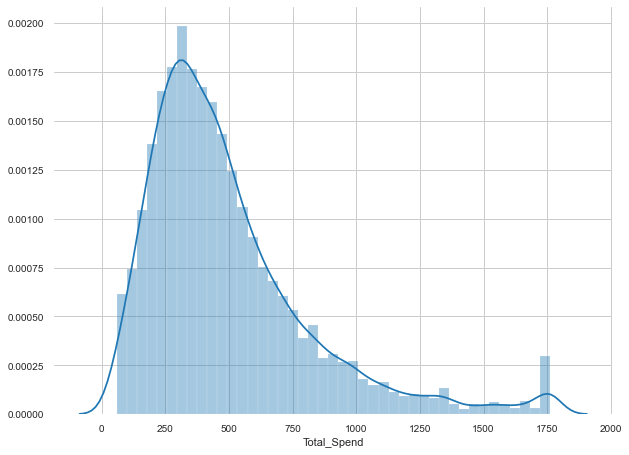

In [22]:
 sns.distplot(creditcard_num.Total_Spend)

In [23]:
# The above curve is not normal. Toconvert it normal take a log,exp etc
creditcard_num['Total_Spend_log']=np.log(creditcard_num['Total_Spend']+1)


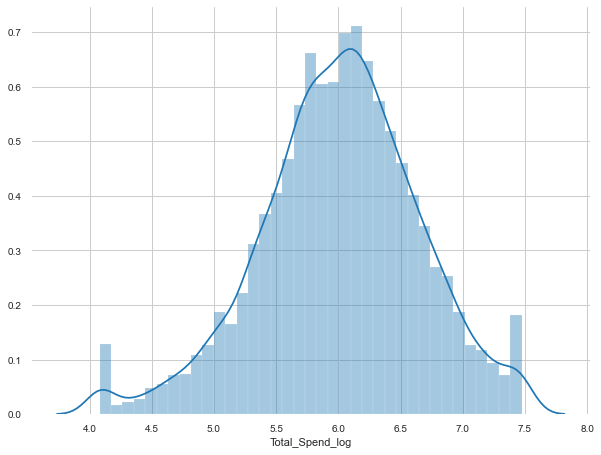

In [24]:
sns.distplot(creditcard_num.Total_Spend_log)

In [25]:
#Drop old non distributed variables
creditcard_num.drop(['Total_Spend'],inplace=True, axis=1)

In [26]:
creditcard_num.corr()

,age,ed,lninc,debtinc,lncreddebt,lnothdebt,reside,pets,pets_cats,pets_dogs,...,lntollmon,lntollten,lnequipmon,lnequipten,lncardmon,lncardten,lnwiremon,lnwireten,hourstv,Total_Spend_log
age,1.000000,-0.093966,0.142984,0.039031,0.108048,0.126986,-0.338338,0.026334,0.015743,0.013091,...,0.034955,0.086301,-0.132051,-0.081547,0.320179,0.411189,-0.064840,-0.027627,-0.027318,0.007393
ed,-0.093966,1.000000,0.206332,0.013871,0.129898,0.154590,0.022048,0.031113,0.008898,0.026018,...,0.026400,0.020551,0.444578,0.434370,-0.049900,-0.061484,0.340456,0.329567,-0.009821,0.098110
lninc,0.142984,0.206332,1.000000,0.013177,0.583844,0.665810,-0.057788,0.005846,0.002866,0.014187,...,0.191792,0.210457,0.096284,0.111044,0.149814,0.173846,0.190829,0.205523,0.108643,0.404987
debtinc,0.039031,0.013871,0.013177,1.000000,0.552910,0.628168,-0.026233,-0.002531,0.001028,-0.003278,...,-0.018041,-0.014213,-0.004764,-0.001577,0.013214,0.018317,-0.001034,0.002502,-0.011577,0.016109
lncreddebt,0.108048,0.129898,0.583844,0.552910,1.000000,0.675448,-0.048186,-0.009845,-0.002685,0.002009,...,0.081385,0.093624,0.055743,0.065307,0.088721,0.107814,0.097915,0.107431,0.040358,0.252984
lnothdebt,0.126986,0.154590,0.665810,0.628168,0.675448,1.000000,-0.070173,0.008033,0.015830,0.004048,...,0.112052,0.127441,0.059696,0.071215,0.104110,0.124576,0.125449,0.137363,0.062290,0.273800
reside,-0.338338,0.022048,-0.057788,-0.026233,-0.048186,-0.070173,1.000000,-0.016431,-0.018253,-0.018430,...,0.030228,0.020477,0.025131,0.022231,-0.036303,-0.050601,0.021880,0.017881,0.027196,0.003770
pets,0.026334,0.031113,0.005846,-0.002531,-0.009845,0.008033,-0.016431,1.000000,0.249982,0.216388,...,-0.008517,-0.003923,0.026683,0.026746,0.014865,0.023630,0.009897,0.009630,0.019436,-0.004720
pets_cats,0.015743,0.008898,0.002866,0.001028,-0.002685,0.015830,-0.018253,0.249982,1.000000,-0.000846,...,-0.028679,-0.026510,0.008935,0.010136,-0.016065,-0.015505,0.003737,0.002728,0.001690,0.002686
pets_dogs,0.013091,0.026018,0.014187,-0.003278,0.002009,0.004048,-0.018430,0.216388,-0.000846,1.000000,...,0.009071,0.013776,0.001231,0.003515,0.011132,0.017098,0.011317,0.014090,0.004590,0.007336


### Categorical Variable Reduction using ANOVA

In [27]:
#performing the anova test and selecting variables with p-value < 0.05 (5%)
pvalue = {}
cat_var_selected = []

for catvar in cat_var_names:
    model = smf.ols("Total_Spend ~ " + catvar , data=creditcard).fit()
    anova_table = sm.stats.anova_lm(model, typ = 2)
    p_value = round(anova_table["PR(>F)"][catvar],4)
    
    if p_value < 0.05:
        pvalue[catvar] = p_value
        cat_var_selected.append(catvar)
pvalue

{'region': 0.0332,
 'gender': 0.0,
 'jobcat': 0.0,
 'employ': 0.0,
 'empcat': 0.0,
 'retire': 0.0,
 'inccat': 0.0,
 'jobsat': 0.0,
 'homeown': 0.0,
 'hometype': 0.0001,
 'address': 0.0001,
 'carown': 0.0,
 'carcatvalue': 0.0,
 'commutebike': 0.0223,
 'reason': 0.0,
 'vote': 0.0,
 'card': 0.0,
 'cardtenurecat': 0.0,
 'card2': 0.0,
 'card2fee': 0.0346,
 'card2tenure': 0.0,
 'card2tenurecat': 0.0,
 'tollfree': 0.0,
 'equip': 0.0004,
 'callcard': 0.025,
 'wireless': 0.0,
 'multline': 0.0004,
 'voice': 0.0247,
 'pager': 0.0001,
 'internet': 0.0,
 'callid': 0.0002,
 'callwait': 0.0,
 'forward': 0.0001,
 'confer': 0.0,
 'owntv': 0.0,
 'ownvcr': 0.0,
 'owndvd': 0.0,
 'owncd': 0.0,
 'ownpda': 0.0,
 'ownpc': 0.0004,
 'ownipod': 0.0239,
 'ownfax': 0.0,
 'news': 0.0065,
 'response_03': 0.0013}

In [28]:
cat_cols= sorted(pvalue.items(), key=lambda x: x[1])
cat_cols

[('gender', 0.0),
 ('jobcat', 0.0),
 ('employ', 0.0),
 ('empcat', 0.0),
 ('retire', 0.0),
 ('inccat', 0.0),
 ('jobsat', 0.0),
 ('homeown', 0.0),
 ('carown', 0.0),
 ('carcatvalue', 0.0),
 ('reason', 0.0),
 ('vote', 0.0),
 ('card', 0.0),
 ('cardtenurecat', 0.0),
 ('card2', 0.0),
 ('card2tenure', 0.0),
 ('card2tenurecat', 0.0),
 ('tollfree', 0.0),
 ('wireless', 0.0),
 ('internet', 0.0),
 ('callwait', 0.0),
 ('confer', 0.0),
 ('owntv', 0.0),
 ('ownvcr', 0.0),
 ('owndvd', 0.0),
 ('owncd', 0.0),
 ('ownpda', 0.0),
 ('ownfax', 0.0),
 ('hometype', 0.0001),
 ('address', 0.0001),
 ('pager', 0.0001),
 ('forward', 0.0001),
 ('callid', 0.0002),
 ('equip', 0.0004),
 ('multline', 0.0004),
 ('ownpc', 0.0004),
 ('response_03', 0.0013),
 ('news', 0.0065),
 ('commutebike', 0.0223),
 ('ownipod', 0.0239),
 ('voice', 0.0247),
 ('callcard', 0.025),
 ('region', 0.0332),
 ('card2fee', 0.0346)]

In [29]:
cat_var_selected = [x for x,y in cat_cols]

In [30]:
creditcard_cat=creditcard[cat_var_selected]

In [31]:
creditcard_cat.head()

,gender,jobcat,employ,empcat,retire,inccat,jobsat,homeown,carown,carcatvalue,...,multline,ownpc,response_03,news,commutebike,ownipod,voice,callcard,region,card2fee
0,1,1,0,1,0,2,1,0,1,1,...,1,0,0,0,0,1,1,1,1,0
1,0,2,0,1,0,1,1,1,1,1,...,1,1,0,1,1,1,1,1,5,0
2,1,2,16,5,0,2,4,1,1,1,...,1,0,0,1,0,0,0,1,3,0
3,0,2,0,1,0,1,2,1,1,1,...,1,1,0,1,0,1,0,1,4,0
4,0,2,1,1,0,1,1,0,0,1,...,0,1,0,0,0,0,1,1,2,0


In [32]:
# An utility function to create dummy variables
def create_dummy(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname)
    col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [33]:
cat_var_selected

['gender',
 'jobcat',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'jobsat',
 'homeown',
 'carown',
 'carcatvalue',
 'reason',
 'vote',
 'card',
 'cardtenurecat',
 'card2',
 'card2tenure',
 'card2tenurecat',
 'tollfree',
 'wireless',
 'internet',
 'callwait',
 'confer',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownfax',
 'hometype',
 'address',
 'pager',
 'forward',
 'callid',
 'equip',
 'multline',
 'ownpc',
 'response_03',
 'news',
 'commutebike',
 'ownipod',
 'voice',
 'callcard',
 'region',
 'card2fee']

In [34]:
# Dummy Creation is done on only these variables because remaning variables are already in dummy form
cat_dummy=['jobcat', 'employ', 'empcat', 'inccat', 'jobsat', 'carown', 'carcatvalue', 'reason',
           'card', 'cardtenurecat', 'card2', 'card2tenure', 'card2tenurecat', 'internet',
           'hometype', 'address','region']




#dummy=['gender','retire','homeown','vote','tollfree','wireless','callwait','confer','owntv','ownvcr','owndvd','owncd',
       #'ownpda','ownfax','pager','forward','callid','equip','multline','ownpc','response_03','news','commutebike','ownipod',
       #'voice','callcard','card2fee']

In [35]:
#For C-Feature in Categorical Features:
for c_feature in cat_dummy:
    creditcard_cat[c_feature]=creditcard_cat[c_feature].astype('category')
    creditcard_cat=create_dummy(creditcard_cat,c_feature)

C:\Users\satya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
creditcard_cat

,gender,retire,homeown,vote,tollfree,wireless,callwait,confer,owntv,ownvcr,...,address_55,address_57,address_6,address_7,address_8,address_9,region_2,region_3,region_4,region_5
0,1,0,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4996,0,0,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4997,0,0,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4998,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Put them back together numerical and categorical
creditcard_new=pd.concat([creditcard_num,creditcard_cat],axis=1)
creditcard_new.head()

,age,ed,lninc,debtinc,lncreddebt,lnothdebt,reside,pets,pets_cats,pets_dogs,...,address_55,address_57,address_6,address_7,address_8,address_9,region_2,region_3,region_4,region_5
0,20,15,3.433987,11.1,0.183079,0.806516,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22,17,2.708050,18.6,0.200505,0.449788,2,6,0,0,...,0,0,0,0,0,0,0,0,0,1
2,67,14,3.555348,9.9,-0.074056,0.930738,3,3,2,1,...,0,0,0,0,0,0,0,1,0,0
3,23,16,2.995732,5.7,-3.401644,0.110826,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,26,16,3.135494,1.7,-1.538705,-1.735336,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
creditcard_new.shape

(5000, 247)

In [39]:
creditcard_new.corr()

,age,ed,lninc,debtinc,lncreddebt,lnothdebt,reside,pets,pets_cats,pets_dogs,...,address_55,address_57,address_6,address_7,address_8,address_9,region_2,region_3,region_4,region_5
age,1.000000,-0.093966,0.142984,0.039031,0.108048,0.126986,-0.338338,0.026334,0.015743,0.013091,...,0.052660,0.042253,-0.124810,-0.103804,-0.100424,-0.065935,0.001396,0.008554,-0.029300,-0.006444
ed,-0.093966,1.000000,0.206332,0.013871,0.129898,0.154590,0.022048,0.031113,0.008898,0.026018,...,-0.017020,-0.014189,0.033796,0.006081,0.043703,0.042387,0.001626,0.000180,0.023015,-0.005175
lninc,0.142984,0.206332,1.000000,0.013177,0.583844,0.665810,-0.057788,0.005846,0.002866,0.014187,...,0.022745,-0.032846,-0.027553,-0.023933,0.015148,0.025119,-0.019842,0.028078,0.013102,0.017487
debtinc,0.039031,0.013871,0.013177,1.000000,0.552910,0.628168,-0.026233,-0.002531,0.001028,-0.003278,...,-0.000680,-0.007122,-0.035387,-0.023082,-0.008031,0.032713,-0.005462,0.008574,0.021401,-0.024550
lncreddebt,0.108048,0.129898,0.583844,0.552910,1.000000,0.675448,-0.048186,-0.009845,-0.002685,0.002009,...,0.027481,-0.029789,-0.034710,-0.015296,0.010054,0.033606,-0.009495,0.031287,0.005196,-0.012408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
address_9,-0.065935,0.042387,0.025119,0.032713,0.033606,0.041598,0.027963,-0.021934,-0.016616,-0.026035,...,-0.005526,-0.004279,-0.032061,-0.032365,-0.032666,1.000000,-0.016115,-0.022658,0.004204,0.016360
region_2,0.001396,0.001626,-0.019842,-0.005462,-0.009495,-0.026643,-0.022899,0.029458,-0.017024,-0.036422,...,0.000079,-0.012213,0.010051,-0.008483,0.006567,-0.016115,1.000000,-0.249686,-0.243911,-0.253417
region_3,0.008554,0.000180,0.028078,0.008574,0.031287,0.034968,-0.006157,-0.024794,0.002507,-0.007243,...,0.015754,0.008122,-0.007587,0.021466,-0.002491,-0.022658,-0.249686,1.000000,-0.245134,-0.254688
region_4,-0.029300,0.023015,0.013102,0.021401,0.005196,0.013484,0.030291,0.013980,-0.008455,0.026987,...,0.016572,0.008697,0.001450,-0.022822,0.003782,0.004204,-0.243911,-0.245134,1.000000,-0.248798


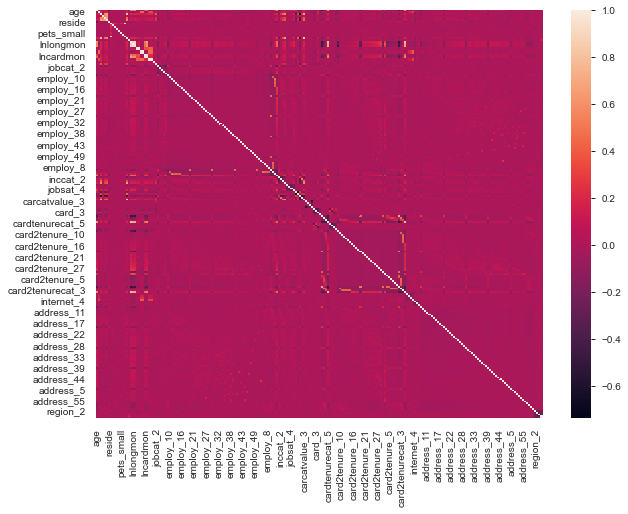

In [40]:
sns.heatmap(creditcard_new.corr())

In [41]:
feature_columns=creditcard_new.columns.difference(['Total_Spend_log'])

In [42]:
feature_columns

Index(['address_1', 'address_10', 'address_11', 'address_12', 'address_13',
       'address_14', 'address_15', 'address_16', 'address_17', 'address_18',
       ...
       'region_4', 'region_5', 'reside', 'response_03', 'retire', 'tenure',
       'tollfree', 'voice', 'vote', 'wireless'],
      dtype='object', length=246)

### Training and Testing Dataset 

In [43]:
train_X,test_X,train_y,test_y=train_test_split(creditcard_new[feature_columns],creditcard_new['Total_Spend_log'],
                                               test_size=0.3,random_state=1)

In [44]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(3500, 246)
(3500,)
(1500, 246)
(1500,)


In [45]:
#Feature importance from Random Forest Model

param_grid={'n_estimators':np.arange(10,25)}
rf_tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)
rf_tree.fit(train_X,train_y)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=True),
             iid='deprecated', n_job

In [46]:
rf_tree.best_params_

{'n_estimators': 24}

In [47]:
rnd_clf=RandomForestRegressor(oob_score=True, n_estimators=24)
rnd_clf.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=24, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
rnd_clf.feature_importances_

array([1.22871957e-03, 1.48292921e-03, 6.31076808e-04, 1.92519417e-03,
       6.93624555e-04, 1.53162958e-03, 1.32008592e-04, 7.86911281e-04,
       7.50063725e-04, 7.56736754e-04, 1.10080739e-03, 7.74449003e-04,
       1.54383998e-03, 1.32044244e-03, 1.71946379e-03, 6.91977522e-04,
       7.08601441e-04, 2.04550588e-03, 1.56590535e-03, 1.20816864e-03,
       3.90299749e-04, 1.22372633e-03, 1.60537418e-03, 6.24799448e-04,
       1.38554468e-03, 5.27144880e-04, 4.09088710e-04, 3.91867972e-04,
       8.53184601e-04, 5.00243521e-04, 9.42873046e-05, 4.37954516e-04,
       7.08480145e-04, 2.17581889e-03, 7.46874064e-04, 1.33360428e-04,
       1.69140339e-04, 3.33233528e-04, 1.21589894e-03, 9.32390656e-04,
       1.07444198e-05, 1.55705946e-04, 1.94762843e-06, 6.00891239e-05,
       1.35277620e-03, 0.00000000e+00, 1.45243800e-04, 1.64311920e-04,
       1.48638282e-07, 3.24652483e-08, 0.00000000e+00, 0.00000000e+00,
       4.72122521e-04, 6.67188201e-04, 1.57235809e-03, 1.04590101e-03,
      

In [49]:
rnd_clf.oob_score_

0.14337496084067047

In [50]:
indices=np.argsort(rnd_clf.feature_importances_)[::-1]
indices

array([203, 200, 112, 206, 114,  56, 116, 204, 180, 205, 103, 117, 198,
       102, 104, 230, 241, 222, 199, 208, 207, 238,  63,  64, 201, 202,
       226, 225, 224, 105, 175, 244, 209, 217, 196, 194,  65, 229,  67,
       210, 190, 176, 233, 223, 177, 243, 178, 119, 216, 189, 234, 195,
       236,  59, 237,  96, 197, 235, 185, 211, 187, 174, 122, 212,  58,
       113, 232, 107, 115, 218, 193, 118, 108, 111, 110, 137, 172,  33,
       215, 213, 192, 100, 191,  17,  81, 239,   3, 171,  94, 186, 220,
        68,  14,  99, 120, 155,  95, 188,  22,  72,  79, 121,  54,  18,
        12,   5, 133,   1, 141,  92, 179,  90,  24,  87,  60, 106, 169,
        44, 214,  98,  13, 126, 128,  84,  61, 144, 143, 134,  93,  73,
         0,  21, 227,  38,  19,  88,  66, 109,  71,  10, 123, 242,  55,
       221,  76,  83,  39, 228, 127, 152, 138,  28, 145,  85, 101,  74,
         7,  70,  11, 146,  78,  69,   9,   8, 181,  57,  34,  77,  16,
        32,   4,  15, 170,  53,  80,   2, 160,  23, 183, 173,  8

In [51]:
feature_rank=pd.DataFrame(columns=['Rank','Features','Importance'])
for i in range(train_X.shape[1]):
    feature_rank.loc[i]=[i+1,train_X.columns[indices[i]],rnd_clf.feature_importances_[indices[i]]]
feature_rank

,Rank,Features,Importance
0,1,lninc,0.195151
1,2,lncreddebt,0.036066
2,3,carvalue,0.033506
3,4,lnothdebt,0.030174
4,5,commutetime,0.028503
...,...,...,...
241,242,employ_46,0.000000
242,243,address_50,0.000000
243,244,employ_42,0.000000
244,245,employ_41,0.000000


In [52]:
x=feature_rank.loc[0:80,['Features']]
x=x['Features'].tolist()
print (x)

['lninc', 'lncreddebt', 'carvalue', 'lnothdebt', 'commutetime', 'age', 'debtinc', 'lnlongmon', 'hourstv', 'lnlongten', 'card_3', 'ed', 'lncardmon', 'card_2', 'card_4', 'reason_2', 'tenure', 'pets', 'lncardten', 'lntollten', 'lntollmon', 'reside', 'card2_2', 'card2_3', 'lnequipmon', 'lnequipten', 'pets_freshfish', 'pets_dogs', 'pets_cats', 'card_5', 'gender', 'vote', 'lnwiremon', 'ownpc', 'jobsat_4', 'jobsat_2', 'card2_4', 'pets_small', 'card2fee', 'lnwireten', 'jobcat_3', 'homeown', 'reason_9', 'pets_birds', 'hometype_2', 'voice', 'hometype_3', 'empcat_3', 'ownipod', 'jobcat_2', 'region_2', 'jobsat_3', 'region_4', 'callwait', 'region_5', 'card2tenure_8', 'jobsat_5', 'region_3', 'internet_1', 'multline', 'internet_3', 'forward', 'employ_1', 'news', 'callid', 'commutebike', 'reason_4', 'cardtenurecat_3', 'confer', 'ownpda', 'jobcat_6', 'empcat_2', 'cardtenurecat_4', 'carown_1', 'carown_0', 'employ_23', 'employ_9', 'address_4', 'ownfax', 'owncd', 'jobcat_5']


In [53]:
rf_features=['lninc', 'lncreddebt', 'carvalue', 'lnothdebt', 'commutetime', 'age', 'debtinc', 'lnlongmon', 'hourstv', 'lnlongten', 'card_3', 'ed', 'lncardmon', 'card_2', 'card_4', 'reason_2', 'tenure', 'pets', 'lncardten', 'lntollten', 'lntollmon', 'reside', 'card2_2', 'card2_3', 'lnequipmon', 'lnequipten', 'pets_freshfish', 'pets_dogs', 'pets_cats', 'card_5', 'gender', 'vote', 'lnwiremon', 'ownpc', 'jobsat_4', 'jobsat_2', 'card2_4', 'pets_small', 'card2fee', 'lnwireten', 'jobcat_3', 'homeown', 'reason_9', 'pets_birds', 'hometype_2', 'voice', 'hometype_3', 'empcat_3', 'ownipod', 'jobcat_2', 'region_2', 'jobsat_3', 'region_4', 'callwait', 'region_5', 'card2tenure_8', 'jobsat_5', 'region_3', 'internet_1', 'multline', 'internet_3', 'forward', 'employ_1', 'news', 'callid', 'commutebike', 'reason_4', 'cardtenurecat_3', 'confer', 'ownpda', 'jobcat_6', 'empcat_2', 'cardtenurecat_4', 'carown_1', 'carown_0', 'employ_23', 'employ_9', 'address_4', 'ownfax', 'owncd', 'jobcat_5']


rf_features.append('Total_Spend_log')
df_randomforest=creditcard_new[rf_features]
df_randomforest.head()

,lninc,lncreddebt,carvalue,lnothdebt,commutetime,age,debtinc,lnlongmon,hourstv,lnlongten,...,cardtenurecat_4,carown_1,carown_0,employ_23,employ_9,address_4,ownfax,owncd,jobcat_5,Total_Spend_log
0,3.433987,0.183079,14.3,0.806516,22.0,20,11.1,1.871802,13,3.538057,...,0,1,0,0,0,0,0,0,0,5.013697
1,2.708050,0.200505,6.8,0.449788,29.0,22,18.6,2.186051,18,5.800909,...,0,1,0,0,0,0,1,1,0,4.363608
2,3.555348,-0.074056,18.8,0.930738,24.0,67,9.9,3.346389,21,7.527444,...,0,1,0,0,0,0,0,1,0,5.888795
3,2.995732,-3.401644,8.7,0.110826,38.0,23,5.7,1.791759,26,5.295564,...,0,1,0,0,0,0,0,1,0,5.887242
4,3.135494,-1.538705,10.6,-1.735336,32.0,26,1.7,1.115142,27,4.305416,...,0,0,1,0,0,0,0,1,0,6.232114


In [54]:
all_columns="+".join(df_randomforest.columns.difference(['Total_Spend_log']))
my_formula="Total_Spend_log~"+all_columns
my_formula

'Total_Spend_log~address_4+age+callid+callwait+card2_2+card2_3+card2_4+card2fee+card2tenure_8+card_2+card_3+card_4+card_5+cardtenurecat_3+cardtenurecat_4+carown_0+carown_1+carvalue+commutebike+commutetime+confer+debtinc+ed+empcat_2+empcat_3+employ_1+employ_23+employ_9+forward+gender+homeown+hometype_2+hometype_3+hourstv+internet_1+internet_3+jobcat_2+jobcat_3+jobcat_5+jobcat_6+jobsat_2+jobsat_3+jobsat_4+jobsat_5+lncardmon+lncardten+lncreddebt+lnequipmon+lnequipten+lninc+lnlongmon+lnlongten+lnothdebt+lntollmon+lntollten+lnwiremon+lnwireten+multline+news+owncd+ownfax+ownipod+ownpc+ownpda+pets+pets_birds+pets_cats+pets_dogs+pets_freshfish+pets_small+reason_2+reason_4+reason_9+region_2+region_3+region_4+region_5+reside+tenure+voice+vote'

In [55]:
#VIF Factor always <10

y,X=dmatrices(my_formula,df_randomforest,return_type='dataframe')

In [56]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['feature']=X.columns

In [57]:
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,feature
0,413.852568,Intercept
65,85.778378,lnwiremon
66,79.835297,lnwireten
63,79.524026,lntollmon
64,76.044522,lntollten
...,...,...
17,1.040035,vote[T.1]
39,1.036877,employ_23
4,1.030483,commutebike[T.1]
7,1.028547,gender[T.1]


In [58]:
vif1=vif[vif['VIF Factor']>10].reset_index().loc[:,['feature']]
vif1.drop([0],axis=0,inplace= True)
drop_vars=vif1['feature'].tolist()
drop_vars

['lncardmon',
 'lncardten',
 'lnequipmon',
 'lnequipten',
 'lnlongten',
 'lntollmon',
 'lntollten',
 'lnwiremon',
 'lnwireten',
 'pets',
 'pets_freshfish',
 'tenure']

In [59]:
df_randomforest.columns

Index(['lninc', 'lncreddebt', 'carvalue', 'lnothdebt', 'commutetime', 'age',
       'debtinc', 'lnlongmon', 'hourstv', 'lnlongten', 'card_3', 'ed',
       'lncardmon', 'card_2', 'card_4', 'reason_2', 'tenure', 'pets',
       'lncardten', 'lntollten', 'lntollmon', 'reside', 'card2_2', 'card2_3',
       'lnequipmon', 'lnequipten', 'pets_freshfish', 'pets_dogs', 'pets_cats',
       'card_5', 'gender', 'vote', 'lnwiremon', 'ownpc', 'jobsat_4',
       'jobsat_2', 'card2_4', 'pets_small', 'card2fee', 'lnwireten',
       'jobcat_3', 'homeown', 'reason_9', 'pets_birds', 'hometype_2', 'voice',
       'hometype_3', 'empcat_3', 'ownipod', 'jobcat_2', 'region_2', 'jobsat_3',
       'region_4', 'callwait', 'region_5', 'card2tenure_8', 'jobsat_5',
       'region_3', 'internet_1', 'multline', 'internet_3', 'forward',
       'employ_1', 'news', 'callid', 'commutebike', 'reason_4',
       'cardtenurecat_3', 'confer', 'ownpda', 'jobcat_6', 'empcat_2',
       'cardtenurecat_4', 'carown_1', 'carown_0', 'e

In [60]:
# dropping variables that have VIF> 10
df_randomforest.drop(drop_vars,axis=1,inplace=True)

C:\Users\satya\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
df_randomforest.shape

(5000, 70)

In [62]:
df_randomforest.columns

Index(['lninc', 'lncreddebt', 'carvalue', 'lnothdebt', 'commutetime', 'age',
       'debtinc', 'lnlongmon', 'hourstv', 'card_3', 'ed', 'card_2', 'card_4',
       'reason_2', 'reside', 'card2_2', 'card2_3', 'pets_dogs', 'pets_cats',
       'card_5', 'gender', 'vote', 'ownpc', 'jobsat_4', 'jobsat_2', 'card2_4',
       'pets_small', 'card2fee', 'jobcat_3', 'homeown', 'reason_9',
       'pets_birds', 'hometype_2', 'voice', 'hometype_3', 'empcat_3',
       'ownipod', 'jobcat_2', 'region_2', 'jobsat_3', 'region_4', 'callwait',
       'region_5', 'card2tenure_8', 'jobsat_5', 'region_3', 'internet_1',
       'multline', 'internet_3', 'forward', 'employ_1', 'news', 'callid',
       'commutebike', 'reason_4', 'cardtenurecat_3', 'confer', 'ownpda',
       'jobcat_6', 'empcat_2', 'cardtenurecat_4', 'carown_1', 'carown_0',
       'employ_23', 'employ_9', 'address_4', 'ownfax', 'owncd', 'jobcat_5',
       'Total_Spend_log'],
      dtype='object')

In [63]:
df_randomforest.head()

,lninc,lncreddebt,carvalue,lnothdebt,commutetime,age,debtinc,lnlongmon,hourstv,card_3,...,cardtenurecat_4,carown_1,carown_0,employ_23,employ_9,address_4,ownfax,owncd,jobcat_5,Total_Spend_log
0,3.433987,0.183079,14.3,0.806516,22.0,20,11.1,1.871802,13,1,...,0,1,0,0,0,0,0,0,0,5.013697
1,2.708050,0.200505,6.8,0.449788,29.0,22,18.6,2.186051,18,0,...,0,1,0,0,0,0,1,1,0,4.363608
2,3.555348,-0.074056,18.8,0.930738,24.0,67,9.9,3.346389,21,0,...,0,1,0,0,0,0,0,1,0,5.888795
3,2.995732,-3.401644,8.7,0.110826,38.0,23,5.7,1.791759,26,0,...,0,1,0,0,0,0,0,1,0,5.887242
4,3.135494,-1.538705,10.6,-1.735336,32.0,26,1.7,1.115142,27,0,...,0,0,1,0,0,0,0,1,0,6.232114


In [64]:
features_columns=df_randomforest.columns.difference(['Total_Spend_log'])

In [65]:
features_columns

Index(['address_4', 'age', 'callid', 'callwait', 'card2_2', 'card2_3',
       'card2_4', 'card2fee', 'card2tenure_8', 'card_2', 'card_3', 'card_4',
       'card_5', 'cardtenurecat_3', 'cardtenurecat_4', 'carown_0', 'carown_1',
       'carvalue', 'commutebike', 'commutetime', 'confer', 'debtinc', 'ed',
       'empcat_2', 'empcat_3', 'employ_1', 'employ_23', 'employ_9', 'forward',
       'gender', 'homeown', 'hometype_2', 'hometype_3', 'hourstv',
       'internet_1', 'internet_3', 'jobcat_2', 'jobcat_3', 'jobcat_5',
       'jobcat_6', 'jobsat_2', 'jobsat_3', 'jobsat_4', 'jobsat_5',
       'lncreddebt', 'lninc', 'lnlongmon', 'lnothdebt', 'multline', 'news',
       'owncd', 'ownfax', 'ownipod', 'ownpc', 'ownpda', 'pets_birds',
       'pets_cats', 'pets_dogs', 'pets_small', 'reason_2', 'reason_4',
       'reason_9', 'region_2', 'region_3', 'region_4', 'region_5', 'reside',
       'voice', 'vote'],
      dtype='object')

In [66]:
df_randomforest

,lninc,lncreddebt,carvalue,lnothdebt,commutetime,age,debtinc,lnlongmon,hourstv,card_3,...,cardtenurecat_4,carown_1,carown_0,employ_23,employ_9,address_4,ownfax,owncd,jobcat_5,Total_Spend_log
0,3.433987,0.183079,14.300,0.806516,22.0,20,11.1,1.871802,13,1,...,0,1,0,0,0,0,0,0,0,5.013697
1,2.708050,0.200505,6.800,0.449788,29.0,22,18.6,2.186051,18,0,...,0,1,0,0,0,0,1,1,0,4.363608
2,3.555348,-0.074056,18.800,0.930738,24.0,67,9.9,3.346389,21,0,...,0,1,0,0,0,0,0,1,0,5.888795
3,2.995732,-3.401644,8.700,0.110826,38.0,23,5.7,1.791759,26,0,...,0,1,0,0,0,0,0,1,0,5.887242
4,3.135494,-1.538705,10.600,-1.735336,32.0,26,1.7,1.115142,27,0,...,0,0,1,0,0,0,0,1,0,6.232114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5.278115,2.071167,64.500,2.047166,21.0,68,8.0,3.529297,19,0,...,0,1,0,0,0,0,0,1,0,7.263098
4996,4.418841,1.204952,40.000,2.209746,26.0,51,15.0,2.341806,14,1,...,1,1,0,0,0,0,0,1,0,5.906315
4997,4.682131,1.269064,53.600,2.092664,32.0,75,10.8,3.380995,16,0,...,0,1,0,0,0,0,0,1,0,7.332206
4998,5.241747,1.613699,92.001,2.733760,13.0,47,10.8,2.073172,24,1,...,0,1,0,0,0,0,0,1,0,6.625326


In [67]:
train_X,test_X,train_y,test_y=train_test_split(df_randomforest[features_columns],df_randomforest['Total_Spend_log'],
                                               test_size=0.3,random_state=211)


print (train_X.shape)
print (test_X.shape)
print (train_y.shape)
print (test_y.shape)


(3500, 69)
(1500, 69)
(3500,)
(1500,)


In [68]:
train_X = sm.add_constant(train_X)

In [69]:
lm=sm.OLS(train_y,train_X.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Total_Spend_log   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     26.46
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          3.94e-263
Time:                        21:02:32   Log-Likelihood:                -2643.2
No. Observations:                3500   AIC:                             5426.
Df Residuals:                    3430   BIC:                             5858.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.3423      0.170     

In [70]:
lm.pvalues.sort_values(ascending=True)

const        5.806263e-190
card_4       3.986149e-102
card_3        3.262088e-84
card_2        7.202273e-78
card2_4       1.598636e-28
                 ...      
pets_dogs     9.557659e-01
callwait      9.579702e-01
ownfax        9.581684e-01
vote          9.600205e-01
jobcat_2      9.770154e-01
Length: 70, dtype: float64

In [71]:
lm.params

const        5.342270
address_4   -0.034892
age         -0.002135
callid       0.005361
callwait    -0.001334
               ...   
region_4     0.020800
region_5     0.080611
reside       0.003535
voice       -0.054215
vote         0.000900
Length: 70, dtype: float64

In [72]:
print('R-Squared Value :'+str(round(lm.rsquared,2)))

R-Squared Value :0.35


In [73]:
test_X = sm.add_constant(test_X)

In [74]:
train_pred=lm.predict(train_X.astype(float))
test_pred=lm.predict(test_X.astype(float))
print('MeanSquaredError Test:',metrics.mean_squared_error(test_y,test_pred))
print('MeanSquaredError Train:',metrics.mean_squared_error(train_y,train_pred))

MeanSquaredError Test: 0.29085807093349625
MeanSquaredError Train: 0.2651436093073992


In [75]:
test_pred.head()

3391    6.620083
2111    6.225489
4073    6.125536
4701    5.487772
1888    5.463325
dtype: float64

In [76]:
train_pred.head()

3528    5.697953
768     5.571696
2286    5.916090
2241    6.278141
708     5.848893
dtype: float64

In [77]:
print('Absolute Mean Error:',metrics.mean_absolute_error(test_y,test_pred))
print('Mean Squared Error:',metrics.mean_squared_error(test_y,test_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(test_y,test_pred)))


Absolute Mean Error: 0.42570213836142967
Mean Squared Error: 0.29085807093349625
Root Mean Squared Error: 0.5393125911134434


In [78]:
MAPE_train = '%.2f' % np.mean(np.abs(train_y-train_pred)/(train_y))
MAPE_test = '%.2f' % np.mean(np.abs(test_y-test_pred)/(test_y))
print('MAPE of training Data: ', MAPE_train,  ' | ', 'MAPE of testing Data: ', MAPE_test)

MAPE of training Data:  0.07  |  MAPE of testing Data:  0.07


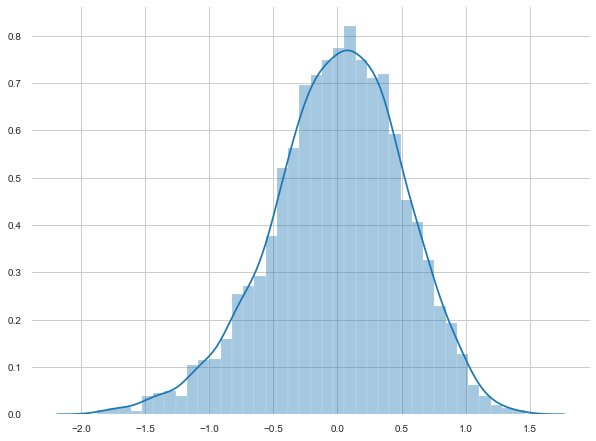

In [79]:
residuals=train_y-train_pred
sns.distplot(residuals)

In [80]:
clf_rf= RandomForestRegressor(n_estimators=100)
clf_rf.fit(train_X, train_y)
y_pred_rf= clf_rf.predict(test_X)
clf_rf.score(test_X,test_y)

0.24963371116758137

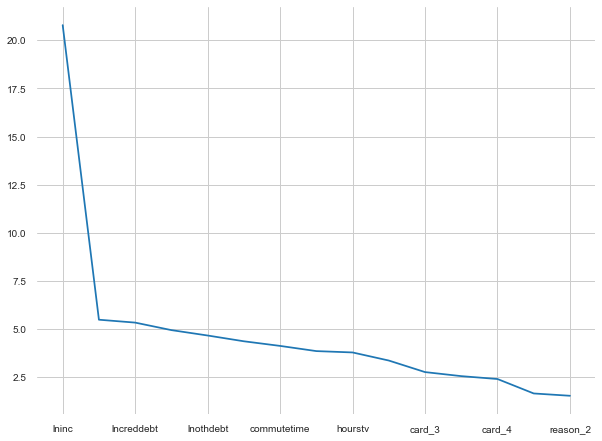

In [81]:
ce=pd.DataFrame(clf_rf.feature_importances_, train_X.columns)
ce.columns=['Coefficients']
ce.sort_values('Coefficients',ascending=False,inplace=True)
ce['Coefficients']=((ce['Coefficients'])*100).round(2)
ce=ce.head(15)
ce.to_excel('Variable_importance.xlsx',index=True)
ce=ce.head(15)
ce.Coefficients.plot()

In [82]:
df_rf=df_randomforest[features_columns]
df_rf=sm.add_constant(df_rf)
df_rf.head()

,const,address_4,age,callid,callwait,card2_2,card2_3,card2_4,card2fee,card2tenure_8,...,reason_2,reason_4,reason_9,region_2,region_3,region_4,region_5,reside,voice,vote
0,1.0,0,20,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,3,1,1
1,1.0,0,22,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,2,1,0
2,1.0,0,67,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,3,0,0
3,1.0,0,23,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,5,0,0
4,1.0,0,26,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,4,1,0


In [83]:
pred_Total_Spend=lm.predict(df_rf.astype(float))
pred_Total_Spend=pd.DataFrame(pred_Total_Spend.tolist())
pred_Total_Spend.columns = ['Pred_Total']
pred_Total_Spend['Pred_Total_Spend'] = np.exp(pred_Total_Spend['Pred_Total'])
pred_Total_Spend.head()

,Pred_Total,Pred_Total_Spend
0,6.008402,406.832770
1,5.688970,295.588991
2,5.965580,389.778959
3,5.809686,333.514236
4,5.900531,365.231515


In [84]:
testdata = pd.concat([creditcard, pred_Total_Spend], axis=1)
testdata.head()

,region,townsize,gender,age,birthmonth,ed,jobcat,union,employ,empcat,...,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_Spend,Pred_Total,Pred_Total_Spend
0,1,2,1,20,9,15,1,1,0,1,...,1,1,0,0,0,1,0,149.46,6.008402,406.832770
1,5,5,0,22,5,17,2,0,0,1,...,1,1,1,1,0,0,0,77.54,5.688970,295.588991
2,3,4,1,67,6,14,2,0,16,5,...,0,0,0,1,0,0,0,359.97,5.965580,389.778959
3,4,3,0,23,5,16,2,0,0,1,...,1,1,0,1,1,0,0,359.41,5.809686,333.514236
4,2,2,0,26,7,16,2,0,1,1,...,0,1,0,0,0,1,0,507.83,5.900531,365.231515


In [85]:
testdata.drop(['Pred_Total'],axis=1,inplace=True)

In [86]:
testdata.head(10)

,region,townsize,gender,age,birthmonth,ed,jobcat,union,employ,empcat,...,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_Spend,Pred_Total_Spend
0,1,2,1,20,9,15,1,1,0,1,...,0,1,1,0,0,0,1,0,149.46,406.832770
1,5,5,0,22,5,17,2,0,0,1,...,1,1,1,1,1,0,0,0,77.54,295.588991
2,3,4,1,67,6,14,2,0,16,5,...,0,0,0,0,1,0,0,0,359.97,389.778959
3,4,3,0,23,5,16,2,0,0,1,...,1,1,1,0,1,1,0,0,359.41,333.514236
4,2,2,0,26,7,16,2,0,1,1,...,1,0,1,0,0,0,1,0,507.83,365.231515
5,4,4,0,64,8,17,3,0,22,5,...,0,0,0,0,0,0,1,0,228.27,474.932112
6,2,5,1,52,7,14,1,0,10,3,...,1,1,0,0,0,0,0,0,952.46,498.884240
7,3,4,1,44,10,16,1,0,11,4,...,0,0,0,0,1,0,0,0,1304.80,1084.455018
8,2,3,1,66,10,12,1,0,15,4,...,0,0,0,0,0,1,0,0,467.83,222.590214
9,2,2,0,47,7,11,6,0,19,5,...,0,0,0,0,0,0,0,0,310.81,514.902340


In [87]:
testdata.to_csv("Final_submission_credit_card_spend.csv")